# Poster DataStories2024

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d

%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 9, 'font.style': 'normal',  'font.family':'serif'})

# get map austria

In [2]:
austria = gpd.read_file('austria-with-regions_.geojson')
austria_c = gpd.read_file('austria-detailed-boundary_854.geojson')

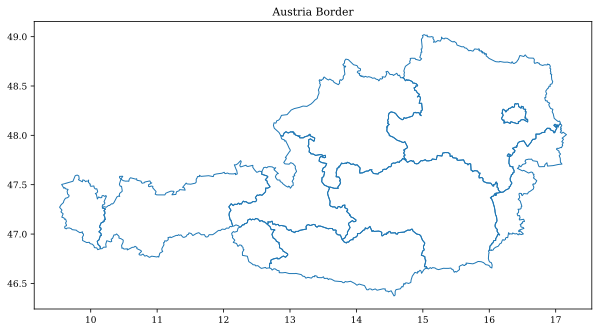

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
austria.boundary.plot(ax=ax, linewidth=1)
#ax.set_aspect('equal')  # Ensure the aspect ratio is preserved
plt.title('Austria Border')
plt.show()

# get the data of the stations

In [4]:
df_loc = pd.read_csv('meta_all.csv')

In [5]:
long = list(df_loc[df_loc['Provider'] == 'AT_HZB']['Longitude'])
lat = list(df_loc[df_loc['Provider'] == 'AT_HZB']['Latitude'])

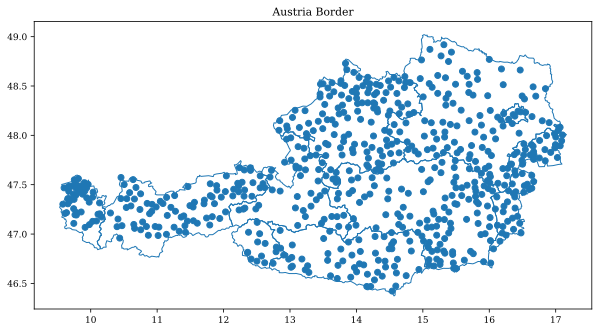

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
austria.boundary.plot(ax=ax, linewidth=1)
#ax.set_aspect('equal')  # Ensure the aspect ratio is preserved
plt.title('Austria Border')
plt.scatter(long, lat)
plt.show()

# get the data of the snow

In [7]:
df_snow = pd.read_csv('data_monthly_AT_HZB.csv')

# Agregated data from 2005 to 2015

In [11]:
start_year = 2005
end_year = 2015

###########################
list_loc = list(set(df_snow.Name))
len_list_loc = len(list(set(df_snow.Name)))

###########################
list_lon = []
list_lat = []
list_snow = []

###########################

for index_loc, loc in enumerate(list_loc):
    print(index_loc, '/', len_list_loc, end='\r')
    df_snow_loc = df_snow[(df_snow.Name == loc) & (df_snow.year >= start_year) & (df_snow.year <= end_year)]
    
    amount_of_snow_one_year = []
    for year in range(start_year, end_year + 1):
        amount_of_snow_one_year.append(sum(df_snow_loc[df_snow_loc.year == year].HN))

    list_lon.append(df_loc[df_loc['Name'] == loc].Longitude.iloc[0])
    list_lat.append(df_loc[df_loc['Name'] == loc].Latitude.iloc[0])
    list_snow.append(np.mean(amount_of_snow_one_year))


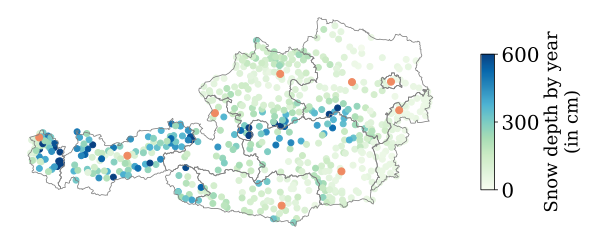

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

color_region = 'grey'
color_country = 'black'
color_city = '#ef8a62'

# plot the regions
austria.boundary.plot(ax=ax, linewidth=0.8, color = color_region)

# plot of the countries
#austria_c.boundary.plot(ax=ax, linewidth=0.8, color = color_region)

plt.axis('off')
sc = plt.scatter(list_lon, list_lat, c = list_snow, cmap = 'GnBu', vmin = 0, vmax = 600)
cbar = plt.colorbar(sc, aspect = 10, ticks = [0, 300, 600], shrink = 0.25)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Snow depth by year\n(in cm)', fontsize = 18)

# plot the cities
plt.scatter([9.7423], [47.5008], color = color_city, s = 50) # bregenz X
plt.scatter([11.4041], [47.2692], color = color_city, s = 50) # innsbruck
plt.scatter([13.0550], [47.8095], color = color_city, s = 50) # salzburg
plt.scatter([14.2858], [48.3069], color = color_city, s = 50) # linz
plt.scatter([16.3738], [48.2082], color = color_city, s = 50) # wien
plt.scatter([15.4395], [47.0707], color = color_city, s = 50) # graz
plt.scatter([16.5280], [47.8464], color = color_city, s = 50) # eisenstadt X
plt.scatter([14.3122], [46.6365], color = color_city, s = 50) # klagenfurt
plt.scatter([15.6382], [48.2035], color = color_city, s = 50) # sankt polten 48.2035° N, 15.6382
 
#plt.show()
plt.savefig('map.pdf')

# Get the different cities

In [13]:
total_y_lim = 125
color_plot = '#ef8a62'
f = 24

In [14]:
list_colors = ['mediumaquamarine','tab:cyan','tab:blue']

/tmp/ipykernel_5176/3138362067.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  list_snow_by_month[k]= float(df_snow[(df_snow.Name == city) & (df_snow.year == year) & (df_snow.month == k)].HN)
/tmp/ipykernel_5176/3138362067.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  list_snow_by_month[k]= float(df_snow[(df_snow.Name == city) & (df_snow.year == year) & (df_snow.month == k)].HN)
/tmp/ipykernel_5176/3138362067.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  list_snow_by_month[k]= float(df_snow[(df_snow.Name == city) & (df_snow.year == year) & (df_snow.month == k)].HN)


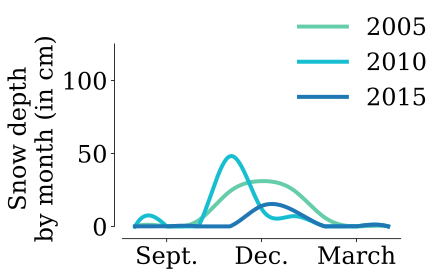

In [15]:
city = 'Wien_Rathausplatz_'
fig, ax = plt.subplots(figsize=(5,3.5))
list_snow_by_month = {k:[] for k  in range(1, 13)}

list_snow_by_month = {}
year = 2005
for k in range(1, 13):
    list_snow_by_month[k]= float(df_snow[(df_snow.Name == city) & (df_snow.year == year) & (df_snow.month == k)].HN)       
X = [k for k in range(9, 13)] + [k for k in range(1, 6)]
Y = [np.mean(list_snow_by_month[k]) for k in X]
X = [k for k in range(len(Y))]
X_Y_Spline = make_interp_spline(X, Y)
X_ = np.linspace(min(X), max(X), 500)
Y_ = X_Y_Spline(X_)
Y_ = [k if k>=0 else 0 for k in Y_]
ax.plot(X_, Y_, color = list_colors[0], label = str(year), linewidth = 4)

#############################
list_snow_by_month = {}
year = 2010
for k in range(1, 13):
    list_snow_by_month[k]= float(df_snow[(df_snow.Name == city) & (df_snow.year == year) & (df_snow.month == k)].HN)       
X = [k for k in range(9, 13)] + [k for k in range(1, 6)]
Y = [np.mean(list_snow_by_month[k]) for k in X]
X = [k for k in range(len(Y))]
X_Y_Spline = make_interp_spline(X, Y)
X_ = np.linspace(min(X), max(X), 500)
Y_ = X_Y_Spline(X_)
Y_ = [k if k>=0 else 0 for k in Y_]
ax.plot(X_, Y_, color = list_colors[1], label = str(year), linewidth = 4)
###############################

list_snow_by_month = {}
year = 2015
for k in range(1, 13):
    list_snow_by_month[k]= float(df_snow[(df_snow.Name == city) & (df_snow.year == year) & (df_snow.month == k)].HN)       
X = [k for k in range(9, 13)] + [k for k in range(1, 6)]
Y = [np.mean(list_snow_by_month[k]) for k in X]
X = [k for k in range(len(Y))]
X_Y_Spline = make_interp_spline(X, Y)
X_ = np.linspace(min(X), max(X), 500)
Y_ = X_Y_Spline(X_)
Y_ = [k if k>=0 else 0 for k in Y_]
ax.plot(X_, Y_, color = list_colors[2], label = str(year), linewidth = 4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((0, total_y_lim))
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

ax.tick_params(axis='both', which='major', labelsize=f)
plt.xticks([1,4,7], ['Sept.', 'Dec.', 'March'])

ax.set_ylabel('Snow depth\nby month (in cm)', fontsize = f)

ax.set_ylim(top = total_y_lim, bottom = -5)

ax.legend(fontsize = f, loc = (0.6, 0.6), frameon=False)

plt.savefig('wien.png',bbox_inches='tight',transparent=True)